In [ ]:
#SOLUTIONS
#CHARGEMENTS DE DONNEES

In [2]:
# Installation via pip
!pip install pandas numpy matplotlib seaborn scikit-learn jupyter


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 103.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 78.3 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Charger un dataset en ligne (exemple : ventes d'une entreprise)
url = "https://raw.githubusercontent.com/datasets/gdp/master/data/gdp.csv"
df = pd.read_csv(url)

In [8]:
# Afficher les premières lignes
print(df.head())

  Country Name Country Code  Year         Value
0  Afghanistan          AFG  2000  3.521418e+09
1  Afghanistan          AFG  2001  2.813572e+09
2  Afghanistan          AFG  2002  3.825701e+09
3  Afghanistan          AFG  2003  4.520947e+09
4  Afghanistan          AFG  2004  5.224897e+09


Le jeux données

In [9]:
# Informations sur le dataset
print(df.info())

# Statistiques descriptives
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13979 entries, 0 to 13978
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  13979 non-null  object 
 1   Country Code  13979 non-null  object 
 2   Year          13979 non-null  int64  
 3   Value         13979 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 437.0+ KB
None
               Year         Value
count  13979.000000  1.397900e+04
mean    1994.672866  1.207380e+12
std       17.731413  5.537517e+12
min     1960.000000  1.150263e+04
25%     1980.000000  2.233880e+09
50%     1996.000000  1.672591e+10
75%     2010.000000  2.058542e+11
max     2023.000000  1.054350e+14


In [10]:
# Statistiques pour une colonne spécifique
colonne = df['Value']  # Adapter selon vos données

In [12]:
#Calcul de la moyenne:
print(f"Moyenne: {colonne.mean():.2f}")
#Calcul de la médiane:
print(f"Médiane: {colonne.median():.2f}")
#Calcul du mode:
print(f"Mode: {colonne.mode()[0]:.2f}")
#Calcul de l'écart type':
print(f"Écart-type: {colonne.std():.2f}")
#Calcul de la variance:
print(f"Variance: {colonne.var():.2f}")
#Calcul du min et du max:
print(f"Min: {colonne.min():.2f}")
print(f"Max: {colonne.max():.2f}")

# Quartiles
print(f"Q1 (25%): {colonne.quantile(0.25):.2f}")
print(f"Q2 (50% - Médiane): {colonne.quantile(0.50):.2f}")
print(f"Q3 (75%): {colonne.quantile(0.75):.2f}")
print(f"IQR: {colonne.quantile(0.75) - colonne.quantile(0.25):.2f}")

Moyenne: 1207379525661.76
Médiane: 16725908148.55
Mode: 340000000.00
Écart-type: 5537517274228.25
Variance: 30664097562376314470531072.00
Min: 11502.63
Max: 105435039507024.09
Q1 (25%): 2233880173.42
Q2 (50% - Médiane): 16725908148.55
Q3 (75%): 205854212632.48
IQR: 203620332459.06


2.2 Visualisation des Statistiques Descriptives

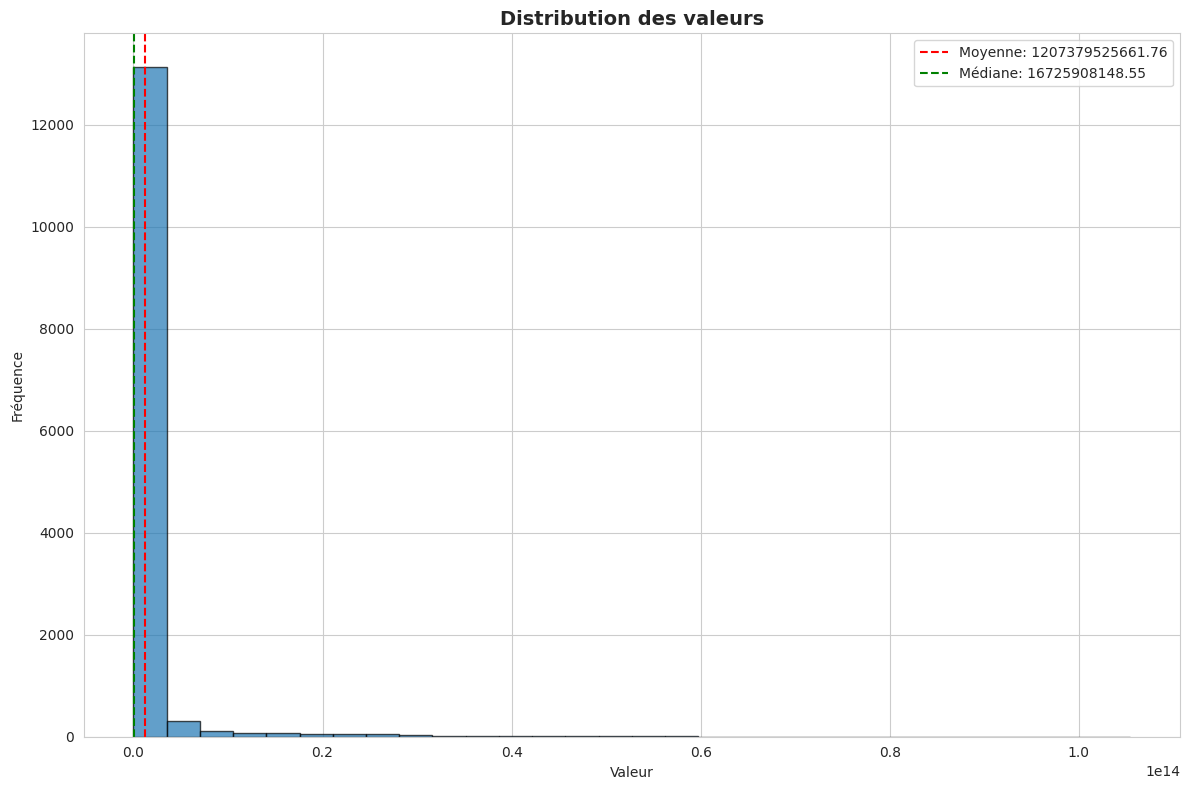

In [14]:
# Configuration du style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# 1. Histogramme
plt.figure(figsize=(12, 8))
plt.hist(colonne, bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution des valeurs', fontsize=14, fontweight='bold')
plt.xlabel('Valeur')
plt.ylabel('Fréquence')

# Ajouter la moyenne et la médiane
plt.axvline(colonne.mean(), color='red', linestyle='--',
                   label=f'Moyenne: {colonne.mean():.2f}')
plt.axvline(colonne.median(), color='green', linestyle='--',
                   label=f'Médiane: {colonne.median():.2f}')
plt.legend()

plt.tight_layout()
plt.show()

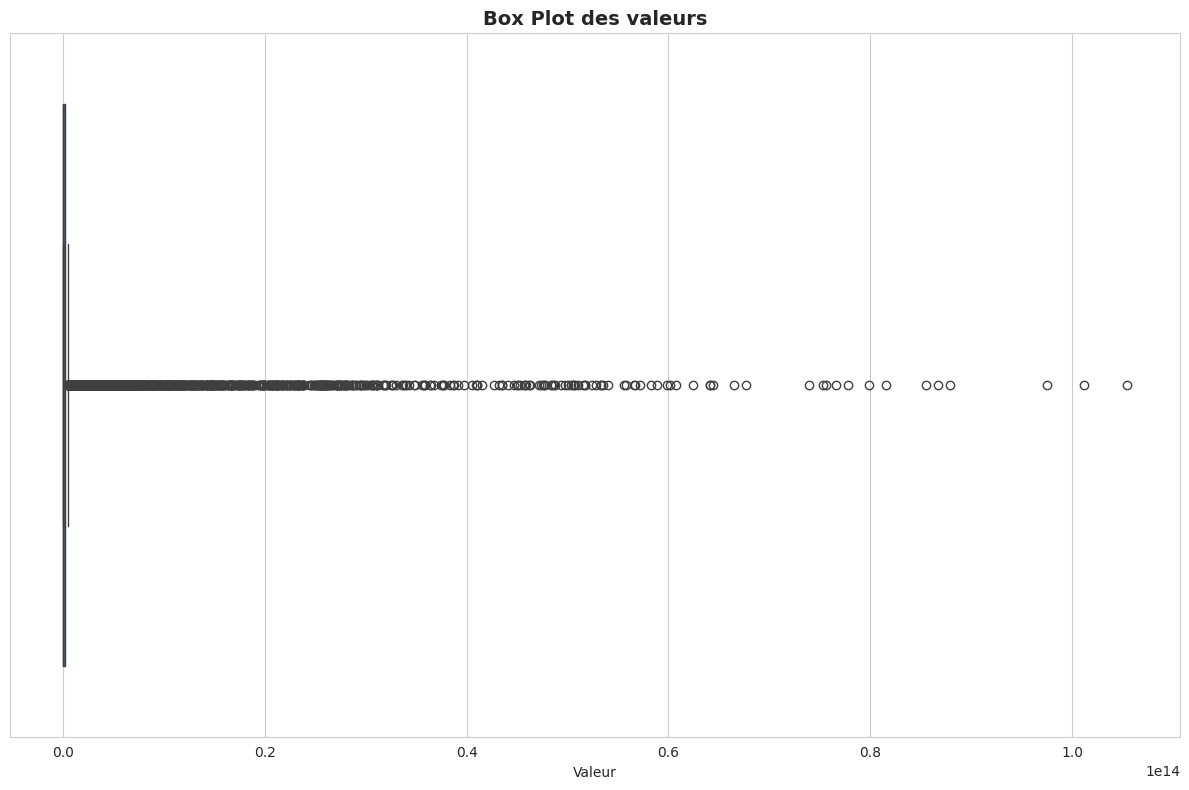

In [15]:
# 2. Box Plot pour visualiser la distribution et les outliers
plt.figure(figsize=(12, 8))
sns.boxplot(x=colonne)
plt.title('Box Plot des valeurs', fontsize=14, fontweight='bold')
plt.xlabel('Valeur')
plt.tight_layout()
plt.show()

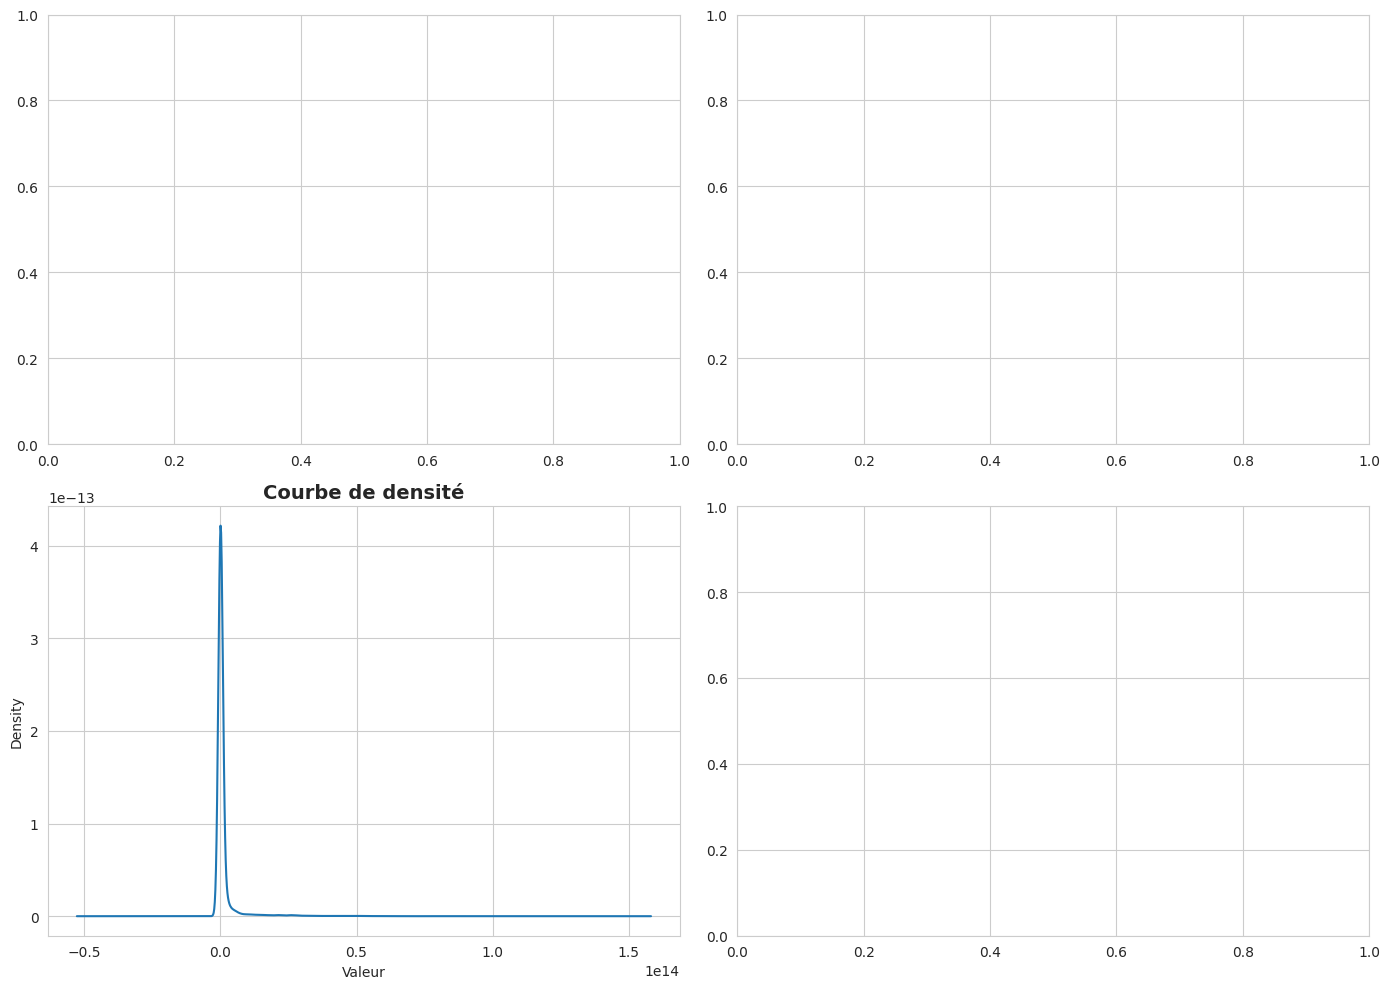

In [20]:
# Configuration du style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Créer une figure avec plusieurs sous-graphiques
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
# 3. Densité
colonne.plot(kind='density', ax=axes[1, 0])
axes[1, 0].set_title('Courbe de densité', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Valeur')
plt.tight_layout()
plt.show()

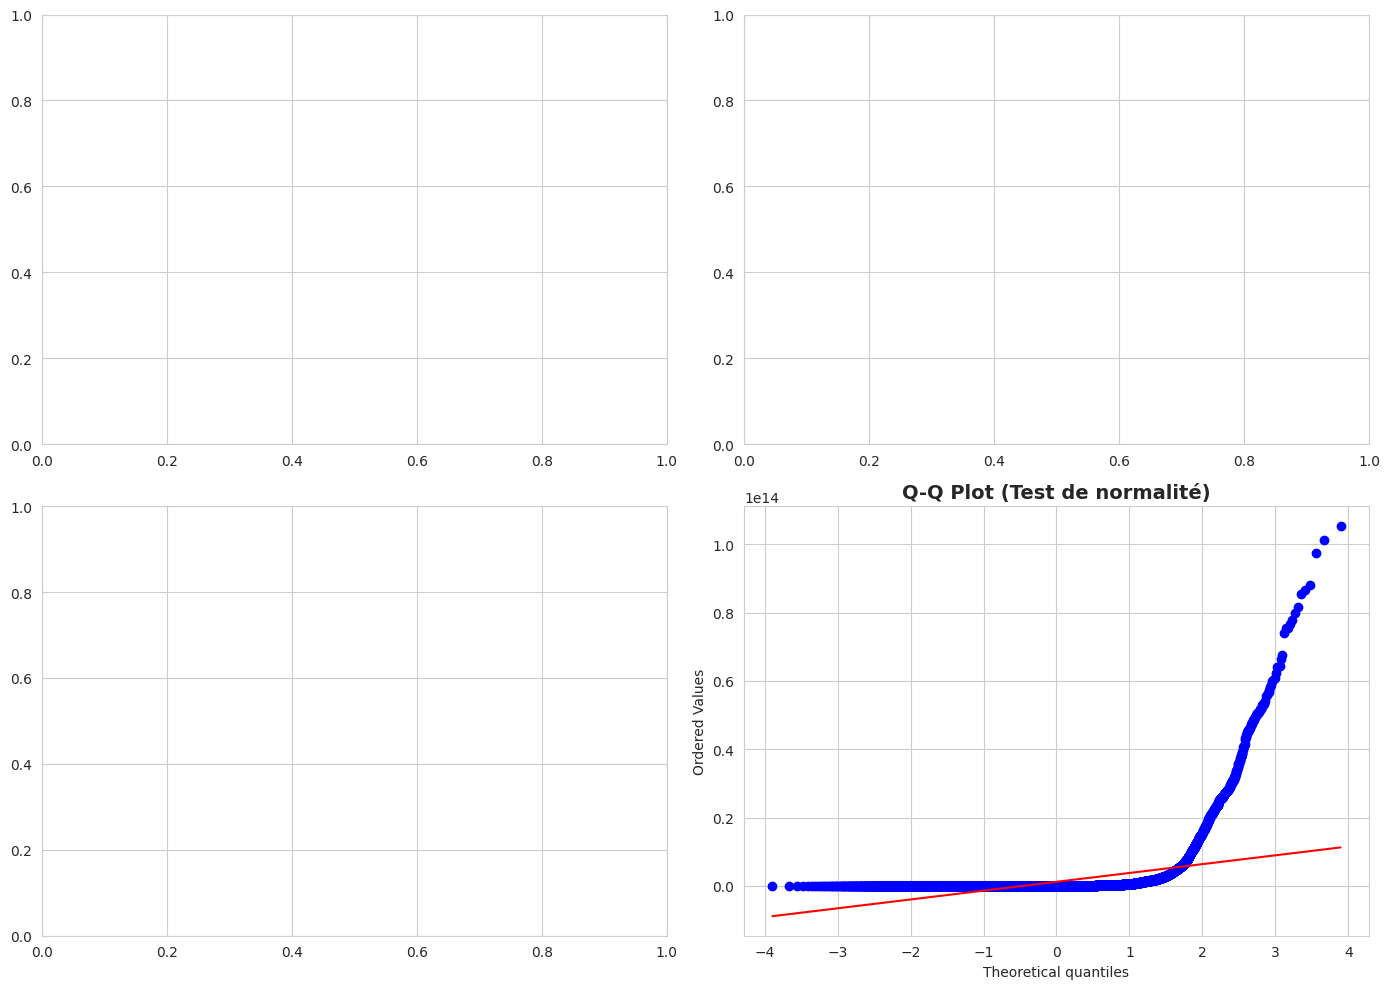

In [21]:
# Créer une figure avec plusieurs sous-graphiques
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
# 4. QQ-plot (pour tester la normalité)
from scipy import stats
stats.probplot(colonne.dropna(), dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (Test de normalité)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()